# **🎯Objective**
Classifies patients as having kidney disease (ckd ) or not using Differents Deep Learning Models

In [1]:
from IPython.display import display, HTML

display(HTML("""
    <div style="display: flex; justify-content: center; align-items: center; background: linear-gradient(45deg, #f58529, #dd2a7b, #8134af, #515bd4); padding: 20px; border-radius: 25px; position: relative;">
        <h1 style="color: white; margin: 0;">
            About Dataset                  
        </h1>
    </div>
"""))


Here’s a brief overview of what each column might represent:  
📌**id :** Unique identifier for each patient.  
📌**age :** Age of the patient.  
📌**bp :** Blood pressure readings.  
📌**sg :** Specific gravity of urine, indicating kidney function.  
📌**al :** Albumin levels in urine, another kidney function indicator.  
📌**su :** Sugar levels in urine, related to diabetes.  
📌**rbc :** Red blood cell count.  
📌**pc :** Pus cell count, indicating infection.  
📌**pcc :** Pus cell clumps, also indicating infection.  
📌**ba :** Bacteria presence  
📌**pcv :** Packed cell volume, related to anemia.  
📌**wc :** White blood cell count, indicating immune response.  
📌**rc :** Red blood cell count.  
📌**htn :** Hypertension status.  
📌**dm :** Diabetes mellitus status.  
📌**cad :** Coronary artery disease status.  
📌**appet :** Appetite status.  
📌**pe :** Presence of pedal edema.  
📌**ane :** Anemia status.  
📌**classification :** Final diagnosis or classification of the patient’s condition.
  


In [2]:
#Import Basics Libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [3]:
#Import Data
df=pd.read_csv("D:/MDP/Datasets/Final_pre_processing_data.csv")

Eda and Data Preprocessing 

In [4]:
df.shape

(400, 29)

In [5]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'age', 'bp', 'sg',
       'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [6]:
df.describe()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0          id         age  \
count    400.000000    400.000000  400.000000  400.000000  400.000000   
mean     199.500000    199.500000  199.500000  199.500000   43.932500   
std      115.614301    115.614301  115.614301  115.614301   16.284684   
min        0.000000      0.000000    0.000000    0.000000    0.000000   
25%       99.750000     99.750000   99.750000   99.750000   34.000000   
50%      199.500000    199.500000  199.500000  199.500000   47.000000   
75%      299.250000    299.250000  299.250000  299.250000   56.000000   
max      399.000000    399.000000  399.000000  399.000000   75.000000   

               bp          sg         al          su         rbc  ...  \
count  400.000000  400.000000  400.00000  400.000000  400.000000  ...   
mean     2.645000    2.542500    0.90000    0.395000    0.882500  ...   
std      1.273983    1.086806    1.31313    1.040038    0.322418  ...   
min      0.000000    0.000000    0.00000    0.000000    0.000000  ...   
25%      2.000000    2.000000    0.00000    0.000000    1.000000  ...   
50%      3.000000    3.000000    0.00000    0.000000    1.000000  ...   
75%      3.000000    3.000000    2.00000    0.000000    1.000000  ...   
max      9.000000    4.000000    5.00000    5.000000    1.000000  ...   

              pcv         wc         rc         htn          dm         cad  \
count  400.000000  400.00000  400.00000  400.000000  400.000000  400.000000   
mean    26.305000   26.69500   26.69500    0.367500    1.337500    0.085000   
std      8.193889    8.64893    8.64893    0.482728    0.478714    0.279231   
min      0.000000    0.00000    0.00000    0.000000    0.000000    0.000000   
25%     21.000000   23.00000   23.00000    0.000000    1.000000    0.000000   
50%     28.000000   30.00000   30.00000    0.000000    1.000000    0.000000   
75%     31.000000   30.00000   30.00000    1.000000    2.000000    0.000000   
max     42.000000   45.00000   45.00000    1.000000    2.000000    1.000000   

            appet          pe         ane  classification  
count  400.000000  400.000000  400.000000      400.000000  
mean     0.205000    0.190000    0.150000        0.375000  
std      0.404207    0.392792    0.357519        0.484729  
min      0.000000    0.000000    0.000000        0.000000  
25%      0.000000    0.000000    0.000000        0.000000  
50%      0.000000    0.000000    0.000000        0.000000  
75%      0.000000    0.000000    0.000000        1.000000  
max      1.000000    1.000000    1.000000        1.000000  

[8 rows x 29 columns]

In [7]:
df.describe()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0          id         age  \
count    400.000000    400.000000  400.000000  400.000000  400.000000   
mean     199.500000    199.500000  199.500000  199.500000   43.932500   
std      115.614301    115.614301  115.614301  115.614301   16.284684   
min        0.000000      0.000000    0.000000    0.000000    0.000000   
25%       99.750000     99.750000   99.750000   99.750000   34.000000   
50%      199.500000    199.500000  199.500000  199.500000   47.000000   
75%      299.250000    299.250000  299.250000  299.250000   56.000000   
max      399.000000    399.000000  399.000000  399.000000   75.000000   

               bp          sg         al          su         rbc  ...  \
count  400.000000  400.000000  400.00000  400.000000  400.000000  ...   
mean     2.645000    2.542500    0.90000    0.395000    0.882500  ...   
std      1.273983    1.086806    1.31313    1.040038    0.322418  ...   
min      0.000000    0.000000    0.00000    0.000000    0.000000  ...   
25%      2.000000    2.000000    0.00000    0.000000    1.000000  ...   
50%      3.000000    3.000000    0.00000    0.000000    1.000000  ...   
75%      3.000000    3.000000    2.00000    0.000000    1.000000  ...   
max      9.000000    4.000000    5.00000    5.000000    1.000000  ...   

              pcv         wc         rc         htn          dm         cad  \
count  400.000000  400.00000  400.00000  400.000000  400.000000  400.000000   
mean    26.305000   26.69500   26.69500    0.367500    1.337500    0.085000   
std      8.193889    8.64893    8.64893    0.482728    0.478714    0.279231   
min      0.000000    0.00000    0.00000    0.000000    0.000000    0.000000   
25%     21.000000   23.00000   23.00000    0.000000    1.000000    0.000000   
50%     28.000000   30.00000   30.00000    0.000000    1.000000    0.000000   
75%     31.000000   30.00000   30.00000    1.000000    2.000000    0.000000   
max     42.000000   45.00000   45.00000    1.000000    2.000000    1.000000   

            appet          pe         ane  classification  
count  400.000000  400.000000  400.000000      400.000000  
mean     0.205000    0.190000    0.150000        0.375000  
std      0.404207    0.392792    0.357519        0.484729  
min      0.000000    0.000000    0.000000        0.000000  
25%      0.000000    0.000000    0.000000        0.000000  
50%      0.000000    0.000000    0.000000        0.000000  
75%      0.000000    0.000000    0.000000        1.000000  
max      1.000000    1.000000    1.000000        1.000000  

[8 rows x 29 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0.2    400 non-null    int64
 1   Unnamed: 0.1    400 non-null    int64
 2   Unnamed: 0      400 non-null    int64
 3   id              400 non-null    int64
 4   age             400 non-null    int64
 5   bp              400 non-null    int64
 6   sg              400 non-null    int64
 7   al              400 non-null    int64
 8   su              400 non-null    int64
 9   rbc             400 non-null    int64
 10  pc              400 non-null    int64
 11  pcc             400 non-null    int64
 12  ba              400 non-null    int64
 13  bgr             400 non-null    int64
 14  bu              400 non-null    int64
 15  sc              400 non-null    int64
 16  sod             400 non-null    int64
 17  pot             400 non-null    int64
 18  hemo            400 non-null  

In [9]:
# Handling Missing Values

df.isnull().sum().sort_values(ascending=True)

Unnamed: 0.2      0
pe                0
appet             0
cad               0
dm                0
htn               0
rc                0
wc                0
pcv               0
hemo              0
pot               0
sod               0
sc                0
ane               0
bu                0
ba                0
pcc               0
pc                0
rbc               0
su                0
al                0
sg                0
bp                0
age               0
id                0
Unnamed: 0        0
Unnamed: 0.1      0
bgr               0
classification    0
dtype: int64

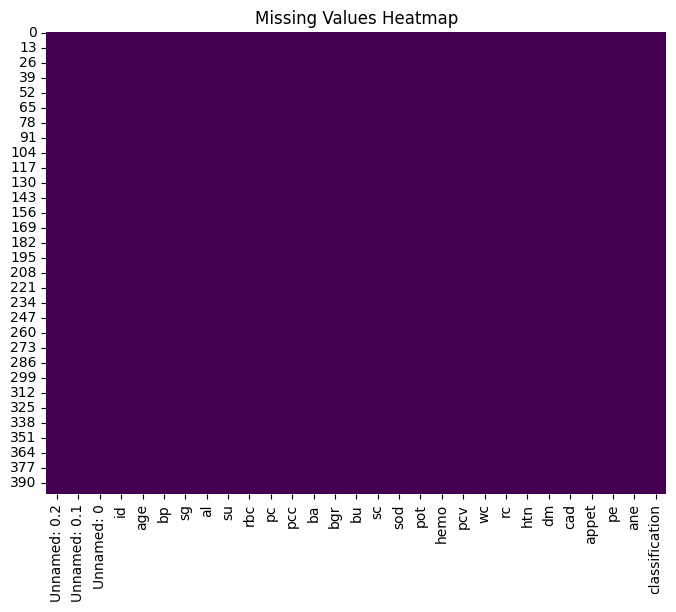

In [10]:
# Create a heatmap of missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
# Handling Missing values

mode=SimpleImputer(missing_values = np.nan , strategy = "most_frequent")
df_clean=pd.DataFrame(mode.fit_transform(df))
df_clean.columns=df.columns
df_clean

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0   id  age  bp  sg  al  su  rbc  \
0               0             0           0    0   40   3   3   1   0    1   
1               1             1           1    1    5   0   3   4   0    1   
2               2             2           2    2   54   3   1   2   3    1   
3               3             3           3    3   40   2   0   4   0    1   
4               4             4           4    4   43   3   1   2   0    1   
..            ...           ...         ...  ...  ...  ..  ..  ..  ..  ...   
395           395           395         395  395   47   3   3   0   0    1   
396           396           396         396  396   34   2   4   0   0    1   
397           397           397         397  397    8   3   3   0   0    1   
398           398           398         398  398   11   1   4   0   0    1   
399           399           399         399  399   50   3   4   0   0    1   

     ...  pcv  wc  rc  htn  dm  cad  appet  pe  ane  classification  
0    ...   31  30  30    1   2    0      0   0    0               0  
1    ...   25  30  30    0   1    0      0   0    0               0  
2    ...   18  30  30    0   2    0      1   0    1               0  
3    ...   19  17  17    1   1    0      1   1    1               0  
4    ...   22  24  24    0   1    0      0   0    0               0  
..   ...  ...  ..  ..  ...  ..  ...    ...  ..  ...             ...  
395  ...   34  27  27    0   1    0      0   0    0               1  
396  ...   41  40  40    0   1    0      0   0    0               1  
397  ...   36  32  32    0   1    0      0   0    0               1  
398  ...   38  37  37    0   1    0      0   0    0               1  
399  ...   40  39  39    0   1    0      0   0    0               1  

[400 rows x 29 columns]

In [12]:
df_clean.isnull().sum()

Unnamed: 0.2      0
Unnamed: 0.1      0
Unnamed: 0        0
id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [13]:
# Convert pcv , wc and rc to numerical type

df_clean['pcv'] = pd.to_numeric(df_clean['pcv'], errors='coerce')
df_clean['wc'] = pd.to_numeric(df_clean['wc'], errors='coerce')
df_clean['rc'] = pd.to_numeric(df_clean['rc'], errors='coerce')

In [14]:
df.select_dtypes(exclude = ['object']).columns
for i in df.select_dtypes(exclude = ['object']).columns:
    df_clean[i] = df_clean[i].apply(lambda x: float(x))

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.2    400 non-null    float64
 1   Unnamed: 0.1    400 non-null    float64
 2   Unnamed: 0      400 non-null    float64
 3   id              400 non-null    float64
 4   age             400 non-null    float64
 5   bp              400 non-null    float64
 6   sg              400 non-null    float64
 7   al              400 non-null    float64
 8   su              400 non-null    float64
 9   rbc             400 non-null    float64
 10  pc              400 non-null    float64
 11  pcc             400 non-null    float64
 12  ba              400 non-null    float64
 13  bgr             400 non-null    float64
 14  bu              400 non-null    float64
 15  sc              400 non-null    float64
 16  sod             400 non-null    float64
 17  pot             400 non-null    flo

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0.2    400 non-null    int64
 1   Unnamed: 0.1    400 non-null    int64
 2   Unnamed: 0      400 non-null    int64
 3   id              400 non-null    int64
 4   age             400 non-null    int64
 5   bp              400 non-null    int64
 6   sg              400 non-null    int64
 7   al              400 non-null    int64
 8   su              400 non-null    int64
 9   rbc             400 non-null    int64
 10  pc              400 non-null    int64
 11  pcc             400 non-null    int64
 12  ba              400 non-null    int64
 13  bgr             400 non-null    int64
 14  bu              400 non-null    int64
 15  sc              400 non-null    int64
 16  sod             400 non-null    int64
 17  pot             400 non-null    int64
 18  hemo            400 non-null  

In [17]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df_clean.columns if df_clean[col].dtype == 'object']
num_cols = [col for col in df_clean.columns if df_clean[col].dtype != 'object']

In [18]:
#Exploring Unique Values in Columns

for i in df_clean.columns:
  print("*****************" , i ,"******************")
  print()
  print(set(df[i].tolist()))
  print()

***************** Unnamed: 0.2 ******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211

In [19]:
# Handling Ambiguities

print(df_clean["rc"].mode())
print(df_clean["wc"].mode())
print(df_clean["pcv"].mode())

0    30.0
Name: rc, dtype: float64
0    30.0
Name: wc, dtype: float64
0    28.0
Name: pcv, dtype: float64


In [20]:
df_clean["classification"] = df_clean["classification"].apply(lambda x :"ckd" if x=="ckd\t" else x)
df_clean["cad"] = df_clean["cad"].apply(lambda x: "no" if x == "\tno" else x)

df_clean["dm"] = df_clean["dm"].apply(lambda x :"no" if x=="\tno" else x)
df_clean["dm"] = df_clean["dm"].apply(lambda x :"yes" if x=="\tyes" else x)
df_clean["dm"] = df_clean["dm"].apply(lambda x :"yes" if x=="\yes" else x)

df_clean["rc"] = df_clean["rc"].apply(lambda x :"5.2" if x=="\tno?" else x)

df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t8400" else x)
df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t6200" else x)
df_clean["wc"] = df_clean["rc"].apply(lambda x :"9800" if x=="\t?" else x)

df_clean["pcv"] = df_clean["pcv"].apply(lambda x :"41" if x=="\t?" else x)
df_clean["pcv"] = df_clean["pcv"].apply(lambda x :"41" if x=="\t43" else x)

In [21]:

df_clean

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0     id   age   bp   sg   al   su  \
0             0.0           0.0         0.0    0.0  40.0  3.0  3.0  1.0  0.0   
1             1.0           1.0         1.0    1.0   5.0  0.0  3.0  4.0  0.0   
2             2.0           2.0         2.0    2.0  54.0  3.0  1.0  2.0  3.0   
3             3.0           3.0         3.0    3.0  40.0  2.0  0.0  4.0  0.0   
4             4.0           4.0         4.0    4.0  43.0  3.0  1.0  2.0  0.0   
..            ...           ...         ...    ...   ...  ...  ...  ...  ...   
395         395.0         395.0       395.0  395.0  47.0  3.0  3.0  0.0  0.0   
396         396.0         396.0       396.0  396.0  34.0  2.0  4.0  0.0  0.0   
397         397.0         397.0       397.0  397.0   8.0  3.0  3.0  0.0  0.0   
398         398.0         398.0       398.0  398.0  11.0  1.0  4.0  0.0  0.0   
399         399.0         399.0       399.0  399.0  50.0  3.0  4.0  0.0  0.0   

     rbc  ...   pcv    wc    rc  htn   dm  cad  appet   pe  ane  \
0    1.0  ...  31.0  30.0  30.0  1.0  2.0  0.0    0.0  0.0  0.0   
1    1.0  ...  25.0  30.0  30.0  0.0  1.0  0.0    0.0  0.0  0.0   
2    1.0  ...  18.0  30.0  30.0  0.0  2.0  0.0    1.0  0.0  1.0   
3    1.0  ...  19.0  17.0  17.0  1.0  1.0  0.0    1.0  1.0  1.0   
4    1.0  ...  22.0  24.0  24.0  0.0  1.0  0.0    0.0  0.0  0.0   
..   ...  ...   ...   ...   ...  ...  ...  ...    ...  ...  ...   
395  1.0  ...  34.0  27.0  27.0  0.0  1.0  0.0    0.0  0.0  0.0   
396  1.0  ...  41.0  40.0  40.0  0.0  1.0  0.0    0.0  0.0  0.0   
397  1.0  ...  36.0  32.0  32.0  0.0  1.0  0.0    0.0  0.0  0.0   
398  1.0  ...  38.0  37.0  37.0  0.0  1.0  0.0    0.0  0.0  0.0   
399  1.0  ...  40.0  39.0  39.0  0.0  1.0  0.0    0.0  0.0  0.0   

     classification  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
..              ...  
395             1.0  
396             1.0  
397             1.0  
398             1.0  
399             1.0  

[400 rows x 29 columns]

In [22]:
sns.pairplot(df_clean)

In [23]:
# Function to create distplot using Plotly Express
def distplot_plotly(col):
    fig = px.histogram(df, x=col, nbins=15, title=f'Distribution of {col}')
    fig.update_layout(
        plot_bgcolor='black',
        paper_bgcolor='black',
        font_color='white'
    )
    fig.show()

# Loop through numerical columns and create distplots
for col in df.select_dtypes(include='number').columns:
    distplot_plotly(col)

In [24]:
# outliers Detection & remove

num_cols1 = num_cols[:-2]
fig = px.box(df_clean[num_cols1], y=num_cols1)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white'
)
fig.show()

In [25]:
encode_data = df_clean.apply(preprocessing.LabelEncoder().fit_transform)
encode_data

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0   id  age  bp  sg  al  su  rbc  \
0               0             0           0    0   40   3   3   1   0    1   
1               1             1           1    1    5   0   3   4   0    1   
2               2             2           2    2   54   3   1   2   3    1   
3               3             3           3    3   40   2   0   4   0    1   
4               4             4           4    4   43   3   1   2   0    1   
..            ...           ...         ...  ...  ...  ..  ..  ..  ..  ...   
395           395           395         395  395   47   3   3   0   0    1   
396           396           396         396  396   34   2   4   0   0    1   
397           397           397         397  397    8   3   3   0   0    1   
398           398           398         398  398   11   1   4   0   0    1   
399           399           399         399  399   50   3   4   0   0    1   

     ...  pcv  wc  rc  htn  dm  cad  appet  pe  ane  classification  
0    ...   31  30  30    1   2    0      0   0    0               0  
1    ...   25  30  30    0   1    0      0   0    0               0  
2    ...   18  30  30    0   2    0      1   0    1               0  
3    ...   19  17  17    1   1    0      1   1    1               0  
4    ...   22  24  24    0   1    0      0   0    0               0  
..   ...  ...  ..  ..  ...  ..  ...    ...  ..  ...             ...  
395  ...   34  27  27    0   1    0      0   0    0               1  
396  ...   41  40  40    0   1    0      0   0    0               1  
397  ...   36  32  32    0   1    0      0   0    0               1  
398  ...   38  37  37    0   1    0      0   0    0               1  
399  ...   40  39  39    0   1    0      0   0    0               1  

[400 rows x 29 columns]

In [26]:
encode_data.to_csv("Final_pre_processing_data.csv")

PermissionError: [Errno 13] Permission denied: 'Final_pre_processing_data.csv'

<Axes: >

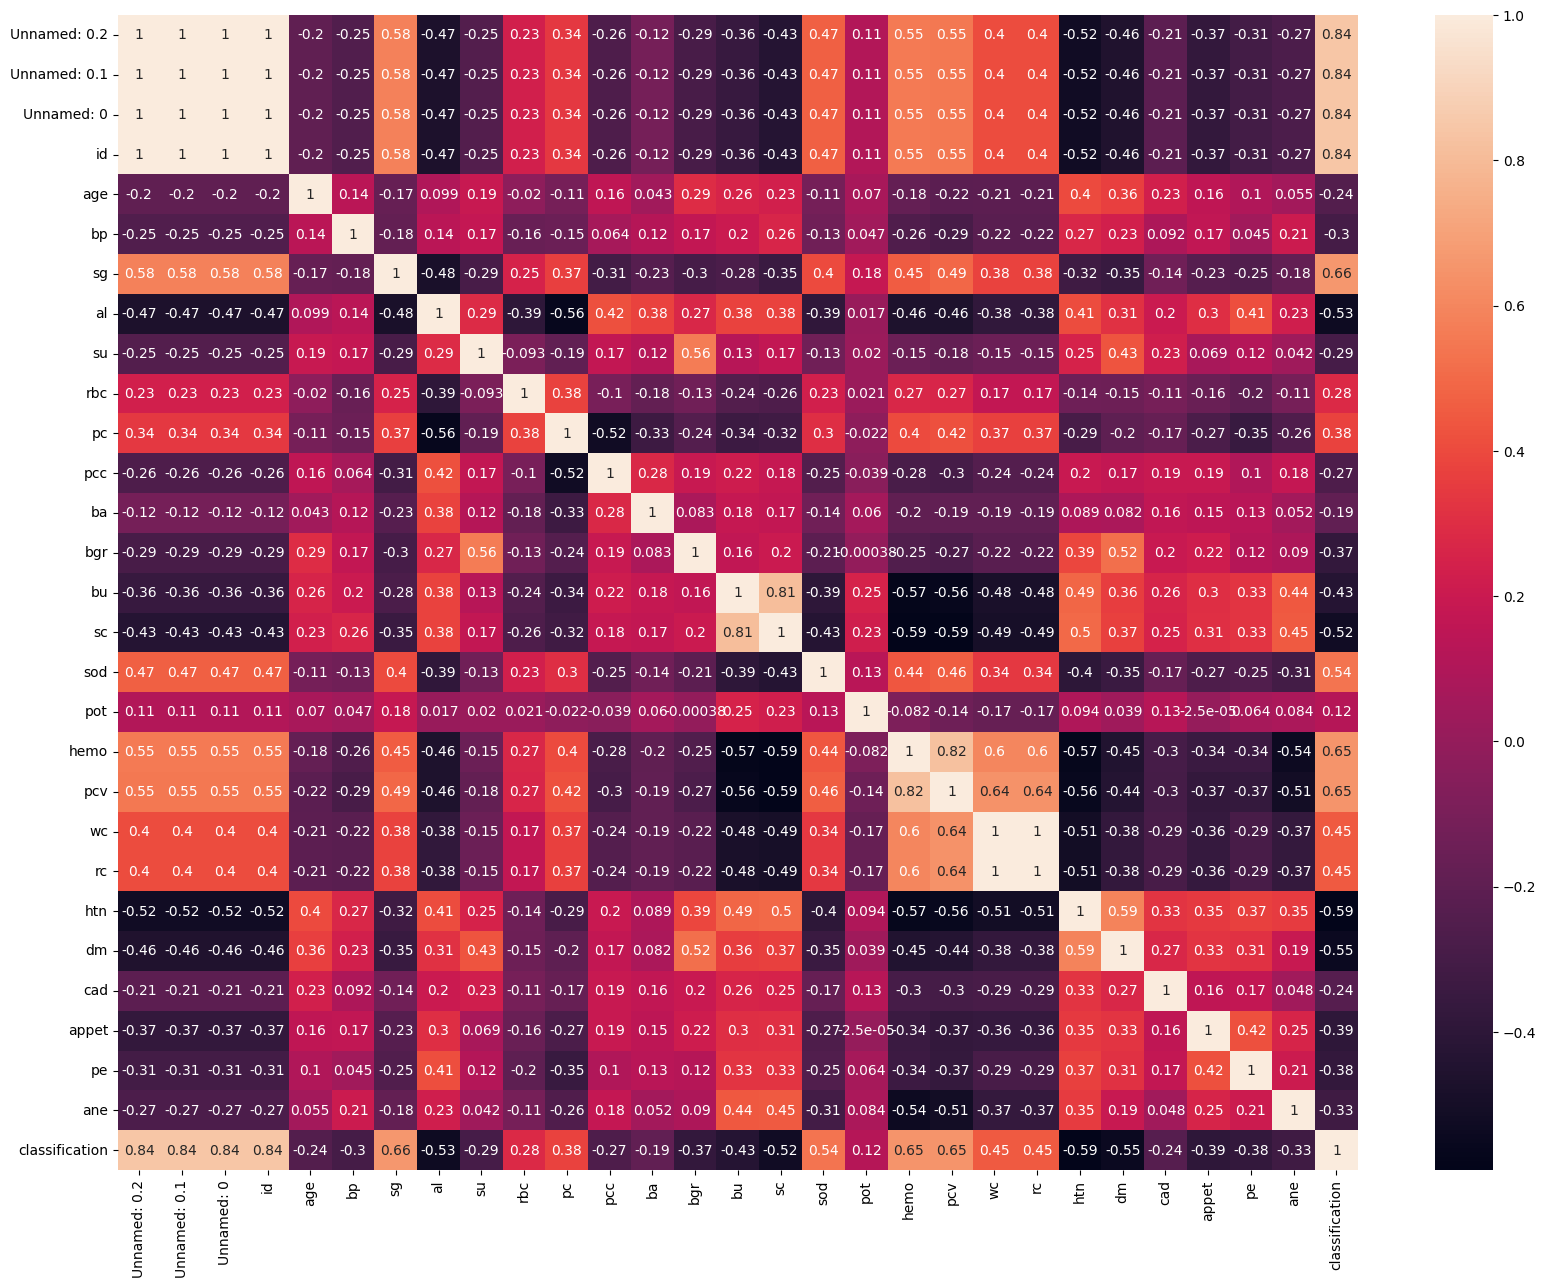

In [ ]:
plt.figure(figsize=(20,15))
corr = encode_data.corr()
sns.heatmap(corr, annot = True)

# **Preprocessing Done🧹🪣🔣**

In [ ]:
from IPython.display import display, HTML

display(HTML("""
    <div style="display: flex; justify-content: center; align-items: center; background: linear-gradient(45deg, #f58529, #dd2a7b, #8134af, #515bd4); padding: 20px; border-radius: 25px; position: relative;">
        <h1 style="color: white; margin: 0;">
            Model Building               📏📐          
        </h1>
    </div>
"""))


In [34]:
# Import Models libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, model_from_json  # Use model_from_json instead of model_from_yaml

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [35]:
# Splitting features and target
X = encode_data.drop(['id', 'classification', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)
y = encode_data['classification']

In [36]:
X

age  bp  sg  al  su  rbc  pc  pcc  ba  bgr  ...  hemo  pcv  wc  rc  htn  \
0     40   3   3   1   0    1   1    0   0   48  ...    90   31  30  30    1   
1      5   0   3   4   0    1   1    0   0   26  ...    49   25  30  30    0   
2     54   3   1   2   3    1   1    0   0  140  ...    32   18  30  30    0   
3     40   2   0   4   0    1   0    1   0   44  ...    48   19  17  17    1   
4     43   3   1   2   0    1   1    0   0   33  ...    52   22  24  24    0   
..   ...  ..  ..  ..  ..  ...  ..  ...  ..  ...  ...   ...  ...  ..  ..  ...   
395   47   3   3   0   0    1   1    0   0   64  ...    93   34  27  27    0   
396   34   2   4   0   0    1   1    0   0    3  ...   101   41  40  40    0   
397    8   3   3   0   0    1   1    0   0   27  ...    94   36  32  32    0   
398   11   1   4   0   0    1   1    0   0   41  ...    78   38  37  37    0   
399   50   3   4   0   0    1   1    0   0   57  ...    94   40  39  39    0   

     dm  cad  appet  pe  ane  
0     2    0      0   0    0  
1     1    0      0   0    0  
2     2    0      1   0    1  
3     1    0      1   1    1  
4     1    0      0   0    0  
..   ..  ...    ...  ..  ...  
395   1    0      0   0    0  
396   1    0      0   0    0  
397   1    0      0   0    0  
398   1    0      0   0    0  
399   1    0      0   0    0  

[400 rows x 24 columns]

In [37]:
# Handle Imbalanced data

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [39]:
print(Counter(y))

Counter({0: 250, 1: 150})


In [40]:
ros=RandomOverSampler()
X_ros, y_ros=ros.fit_resample(X, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [41]:
# Scale the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X_ros)
y=y_ros

In [42]:
y

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: classification, Length: 500, dtype: int64

In [43]:
df.shape  #24

(400, 29)

In [44]:
#Apply PCA For Dimentionaly Reduction

from sklearn.decomposition import PCA

In [45]:
pca=PCA(.95)
X_PCA=pca.fit_transform(X_scaled)

In [46]:
print(X.shape)
print(X_PCA.shape)

(400, 24)
(500, 18)


# **Long short-term memory (LSTM) Model🧠**

In [47]:
# Splitting into train and test sets for LSTM

X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.2, random_state=42)


In [48]:
# Build Model
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(units=1, activation='sigmoid'))

In [49]:
# Compile the Model

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# Train the model

history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=30, batch_size=32, verbose=0, validation_data=(X_test_lstm, y_test_lstm))

Text(0.5, 0, 'epoch')

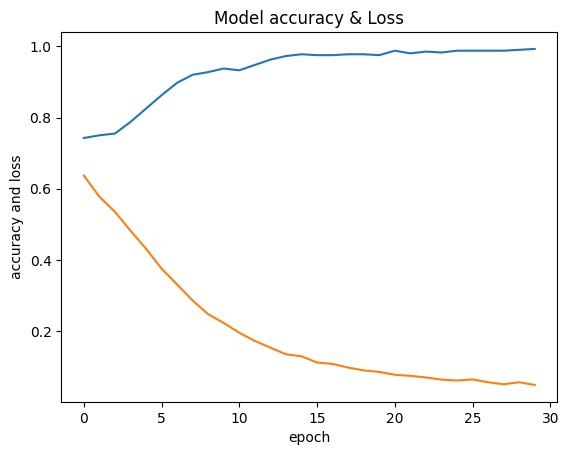

In [51]:
#Visualize the models loss and accuracy
plt.plot(history_lstm.history["accuracy"])
plt.plot(history_lstm.history["loss"])
plt.title("Model accuracy & Loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")

In [52]:
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype(int)

# Create a DataFrame to display the actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test_lstm.values.flatten(),
    'Predicted': y_pred_lstm.flatten()
})

# Print the first few rows of the results
print("Actual vs Predicted Values:")
print(results_df.head())

4/4 [==============================] - 0s 5ms/step
Actual vs Predicted Values:
   Actual  Predicted
0       1          1
1       0          0
2       1          1
3       0          1
4       0          0


In [53]:
accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
print("Long Short-Term Memory (LSTM) Model Accuracy Score:", accuracy_lstm)

Long Short-Term Memory (LSTM) Model Accuracy Score: 0.96


# **Display accuracy scores🖥️**

In [54]:

print("Long Short-Term Memory (LSTM) Model Accuracy Score:", accuracy_lstm)


Long Short-Term Memory (LSTM) Model Accuracy Score: 0.96


In [55]:
models = pd.DataFrame({
    'Model': ['Long Short-Term Memory (LSTM) Model'],
    'Accuracy Score': [accuracy_lstm]
})

# Display the DataFrame
print(models)

                                 Model  Accuracy Score
0  Long Short-Term Memory (LSTM) Model            0.96


In [56]:
import pickle

In [57]:

filename = 'chronic-kidney-disease.sav'
pickle.dump(model_lstm, open(filename, 'wb'))


INFO:tensorflow:Assets written to: ram://aa3d3a67-63e8-4706-bf1b-98283e410479/assets


INFO:tensorflow:Assets written to: ram://aa3d3a67-63e8-4706-bf1b-98283e410479/assets


In [58]:
from tensorflow.keras.models import Sequential

# Assuming `model` is your trained LSTM model
model_lstm.save('lstm_model.h5')  # Save in HDF5 format
# or
 # Save as TensorFlow SavedModel


In [59]:
model_lstm.save('lstm_model') 

INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets
